In [3]:
#import tensorflow
from tensorflow import keras

from tensorflow.python.keras.layers import Conv2D,Flatten,Dense,MaxPool2D, GlobalAveragePooling2D
#from tensorflow.python.keras.layers import BatchNormalization
from keras_applications.resnet50 import preprocess_input, decode_predictions
from keras_preprocessing.image import ImageDataGenerator,load_img
from keras_applications.resnet50 import ResNet50
from keras_preprocessing import image
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import torch

In [4]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = r"processed_data\train"
valid_data_dir = r"processed_data\val"
test_data_dir  = r"processed_data\test"

In [5]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data


valid_generator = train_datagen.flow_from_directory(
    valid_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 898 images belonging to 3 classes.
Found 198 images belonging to 3 classes.


In [6]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 199 images belonging to 3 classes.


In [7]:
x,y = test_generator.next()
x.shape

AttributeError: 'NoneType' object has no attribute 'image_data_format'

In [8]:
train_generator.num_classes

3

In [9]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_generator, validation_data = valid_generator,
                         epochs = 40)

AttributeError: 'NoneType' object has no attribute 'image_data_format'

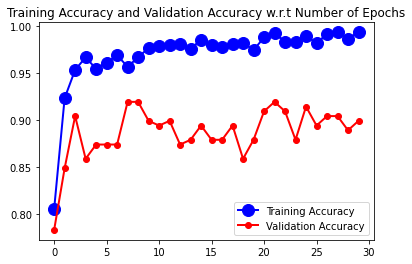

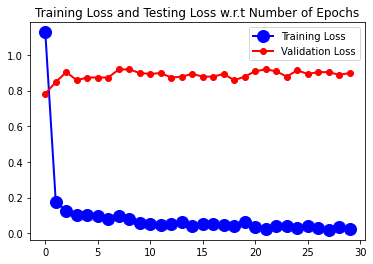

In [54]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

No_Of_Epochs = range(30)

plt.plot(No_Of_Epochs, train_acc, marker = 'o', color = 'blue', markersize = 12, 
                 linewidth = 2, label = 'Training Accuracy')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12, 
                 linewidth = 2, label = 'Validation Accuracy')

plt.title('Training Accuracy and Validation Accuracy w.r.t Number of Epochs')

plt.legend()

plt.figure()

plt.plot(No_Of_Epochs, train_loss, marker = 'o', color = 'blue', markersize = 12, 
                 linewidth = 2, label = 'Training Loss')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12, 
                 linewidth = 2, label = 'Validation Loss')

                 
plt.title('Training Loss and Testing Loss w.r.t Number of Epochs')

plt.legend()

plt.show()

In [55]:
model.save('Saved_Model\ResNet50_Apples.h5' )

c:\Users\Emmanuel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

199/199 - 30s - loss: 0.6155 - accuracy: 0.8744 - 30s/epoch - 152ms/step

Test accuracy: 0.8743718862533569


1/1 [==============================] - 0s 149ms/step


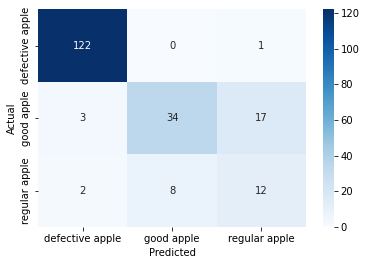

test accuracy : 84.42211055276381


In [57]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model("Saved_Model\ResNet50_Apples.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [58]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='training') # set as training data

Found 898 images belonging to 3 classes.


In [59]:
test_generator = train_generator

1/1 [==============================] - 0s 194ms/step


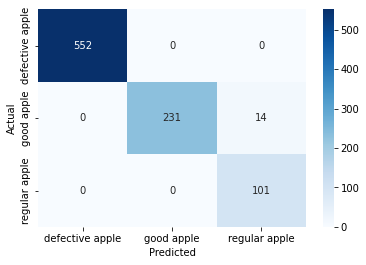

test accuracy : 98.44097995545657


In [60]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model("Saved_Model\ResNet50_Apples.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))